In [2]:
!pip install gower

In [43]:
import pandas as pd
import numpy as np
# visual
import matplotlib.pyplot as plt
import seaborn as sns
# distance
import gower
# sklearn
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, rand_score

In [44]:
# Adjusted function to read and parse the .data file, ensuring -1 class is correctly handled
def load_data(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    data = []
    current_class = None

    # Columns from the first line (removing the last two characters \n and space at the end)
    columns = lines[0].strip().split()
    columns.append('Class')  # Adding the 'Class' column for labels

    # Parse each line
    for line in lines[1:]:  # Start from the second line to skip header
        stripped_line = line.strip()
        if stripped_line.lstrip('-').isdigit():  # This is a class label, handles negative numbers
            current_class = int(stripped_line)
        else:
            # This is a data line, split by spaces and convert to float
            data_values = list(map(float, stripped_line.split()))
            data_values.append(current_class)  # Append the current class
            data.append(data_values)

    # Create DataFrame
    df = pd.DataFrame(data, columns=columns)
    return df

# Load and label the data including -1 correctly
df = load_data('rocket_league_skillshots.data')



In [45]:
# export data frame to .csv file

df.to_csv('rocket_league_with_classes.csv', sep = ',')

In [46]:
df['Class'].nunique()

7

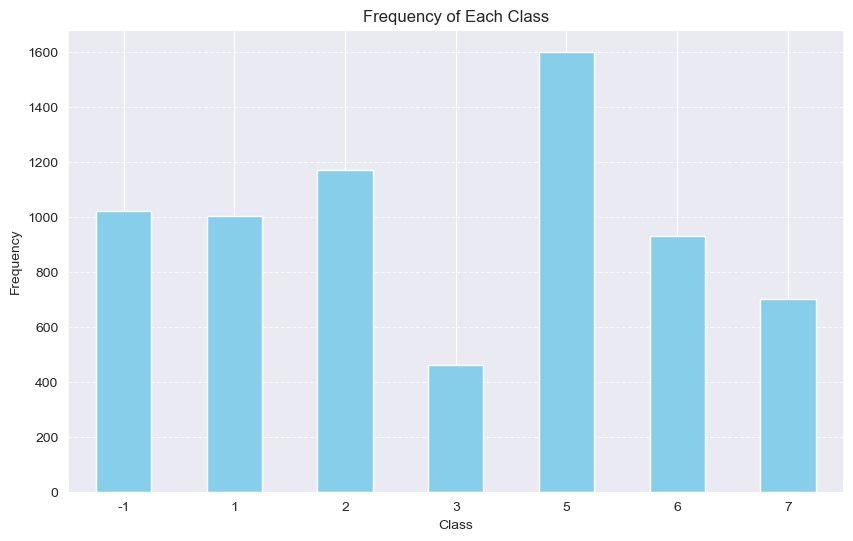

In [47]:
# Plotting the histogram of the frequency of each class including -1
plt.figure(figsize=(10, 6))
df['Class'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Frequency of Each Class')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Keep the class labels horizontal for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [52]:
df_no_target = df.drop(columns=['Class'])

In [53]:
gower_matrix = gower.gower_matrix(df_no_target)

In [54]:
print(gower_matrix)

[[0.         0.06204601 0.1733871  ... 0.2889611  0.34374708 0.23063426]
 [0.06204601 0.         0.11171145 ... 0.2290952  0.28388116 0.28187945]
 [0.1733871  0.11171145 0.         ... 0.22874232 0.28352827 0.28152657]
 ...
 [0.2889611  0.2290952  0.22874232 ... 0.         0.05718599 0.06063179]
 [0.34374708 0.28388116 0.28352827 ... 0.05718599 0.         0.11455691]
 [0.23063426 0.28187945 0.28152657 ... 0.06063179 0.11455691 0.        ]]


# Agglomerative Clustering

In [55]:
model = AgglomerativeClustering(n_clusters = 7, affinity = 'precomputed')

In [65]:
target = df[['Class']]
le = LabelEncoder()

labeled_target = target.apply(le.fit_transform)

labels = pd.DataFrame()
labels['target'] = labeled_target.values.reshape(1, -1).tolist()[0]


array([6], dtype=int64)

## Trying three different kinds of linkages for agglomerative clustering

### Single Linkage

In [68]:
model_single_linkage = AgglomerativeClustering(n_clusters = 7, linkage= 'single', metric = 'precomputed')
clusters_single_linkage = model_single_linkage.fit_predict(gower_matrix)

In [69]:
labels['single_linkage_predictions'] = clusters_single_linkage

In [73]:
sri = rand_score(labeled_target.values.reshape(1, -1)[0], clusters_single_linkage)
print(f'Rand Index: {sri}')

Rand Index: 0.16064284476804175


<Axes: ylabel='count'>

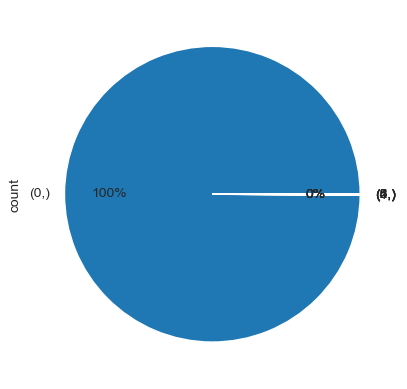

In [75]:
labels[['single_linkage_predictions']].value_counts().plot.pie(autopct='%1.0f%%', pctdistance=0.7, labeldistance=1.1)

This shows that all the data has fallen under one cluster. This is not a good representation of the data

## Average Clustering

In [79]:
model_average_linkage = AgglomerativeClustering(n_clusters = 7, linkage = 'average', affinity = 'precomputed')
clusters_average_linkage = model_average_linkage.fit_predict(gower_matrix)

C:\Users\Zaza\Tools\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [80]:
labels['average_linkage_predictions'] = clusters_average_linkage

In [81]:
ari = rand_score(labeled_target.values.reshape(1, -1)[0], clusters_average_linkage)
print(f'Rand Index: {ari}')

Rand Index: 0.2866094234297379


<Axes: ylabel='count'>

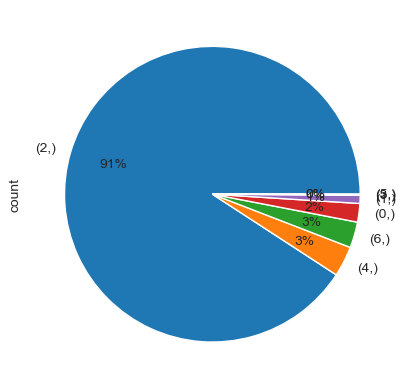

In [82]:
labels[['average_linkage_predictions']].value_counts().plot.pie(autopct='%1.0f%%', pctdistance=0.7, labeldistance=1.1)

The number of classes representing each type of data is diversifying but still the classes are being represented well.

## Complete Linkage

In [83]:
model_complete_linkage = AgglomerativeClustering(n_clusters=7, linkage = 'complete', affinity= 'precomputed')
clusters_complete_linkage = model_complete_linkage.fit_predict(gower_matrix)

C:\Users\Zaza\Tools\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [84]:
labels['complete_linkage_predictions'] = clusters_complete_linkage

In [85]:
cri = rand_score(labeled_target.values.reshape(1, -1)[0], clusters_complete_linkage)
print(f'Rand Index: {cri}')

Rand Index: 0.6514787555462124


<Axes: ylabel='count'>

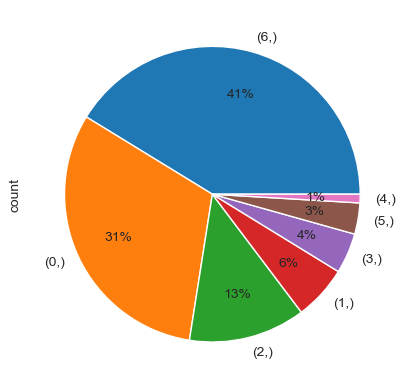

In [86]:
labels[['complete_linkage_predictions']].value_counts().plot.pie(autopct='%1.0f%%', pctdistance=0.7, labeldistance=1.1)

In [87]:
labels.value_counts(["target", "complete_linkage_predictions"])

target  complete_linkage_predictions
4       6                               605
        0                               560
1       6                               513
2       6                               506
        0                               443
0       6                               440
5       6                               374
4       2                               358
5       0                               335
1       0                               325
0       0                               277
6       6                               257
3       5                               175
6       0                               171
0       2                               149
3       6                               148
6       1                               140
5       1                               112
1       2                               105
0       1                               100
6       2                                82
2       2                              

In [88]:
labels['aligned_clusters'] = labels['complete_linkage_predictions'].apply(lambda x: int(not x))

Text(0.5, 25.52222222222222, 'Predicted Labels')

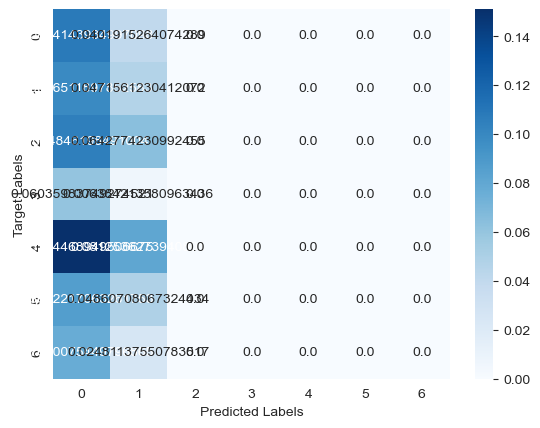

In [109]:
cf_matrix = confusion_matrix(labeled_target.values, labels[["aligned_clusters"]].values)
cf_labels = ['True Neg','False Pos','False Neg','True Pos']
fig, ax = plt.subplots(1, 1)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=cf_labels, fmt='', cmap='Blues')
ax.set_ylabel('Target Labels')
ax.set_xlabel('Predicted Labels')

# KMeans Clustering